In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , recall_score , f1_score , classification_report , auc , roc_curve , ConfusionMatrixDisplay ,  roc_auc_score
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.preprocessing import LabelEncoder , RobustScaler , StandardScaler
from sklearn.neural_network import MLPClassifier

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD ,Adam
from tensorflow.keras.utils import plot_model


plt.style.use("fivethirtyeight")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/classification-test-file/Classification_Test_file.csv
/kaggle/input/creditcardfraud/creditcard.csv


# **Obtain the Data Set**

In [14]:
creditCard = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [15]:
creditCard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
creditCard.sample(25)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
77276,56975.0,1.067040,-0.339436,-1.276529,0.347490,2.086252,3.643411,-0.304285,0.822787,0.160491,...,-0.121870,-0.534437,-0.216155,1.015090,0.855899,-0.337465,0.006142,0.030148,110.00,0
11637,19913.0,-0.372465,0.206560,1.661424,-0.915875,0.058554,0.445522,-0.218194,0.095321,-0.114211,...,-0.138308,-0.149126,-0.437533,-0.874873,0.479602,-0.092929,0.035918,0.039253,5.00,0
122331,76521.0,-5.875318,5.507294,-2.378438,0.562244,-2.289201,2.832502,-7.519162,-10.296369,-2.716734,...,-6.164946,1.450960,1.142344,-1.158551,0.188263,-0.527447,-1.051851,0.000909,0.12,0
114938,73683.0,1.222378,-0.023031,-1.217719,0.092057,2.161594,3.395634,-0.403187,0.790496,-0.151023,...,0.038148,-0.069353,-0.175536,1.009363,0.820772,-0.269122,0.014096,0.021331,39.00,0
261618,160105.0,-2.343720,-3.295719,-3.052722,0.611693,-4.043137,1.765830,5.615925,-0.155720,-0.516160,...,0.942426,-0.073068,3.866685,0.391592,-0.255073,0.164083,-0.634130,0.095127,1562.39,0
222960,143193.0,2.029783,-0.130980,-1.755463,0.249633,0.441490,-0.602388,0.304425,-0.166405,0.198609,...,0.015913,0.144420,0.111188,0.748271,0.124860,0.511811,-0.107881,-0.080135,12.95,0
236145,148685.0,1.210783,-3.064432,-3.495797,-1.369533,-0.471260,-0.601412,0.670333,-0.551895,-2.231694,...,0.485263,0.411761,-0.739644,0.149944,0.458599,0.224796,-0.204914,0.008610,637.80,0
75850,56278.0,1.123527,-0.088891,0.990312,0.532764,-0.763132,-0.067102,-0.571099,0.253485,0.225528,...,-0.003183,-0.047157,0.144801,0.221382,0.003194,0.215565,0.001193,0.013308,5.99,0
5064,4698.0,-0.491006,1.060390,1.672531,1.066874,0.127755,-0.127493,0.749652,-0.116058,0.991547,...,-0.142861,0.024332,-0.107336,0.364266,0.174040,-0.424113,-0.077613,0.006569,32.86,0
35783,38263.0,0.834041,-0.738837,0.801434,0.735992,-1.268223,-0.617355,-0.295105,-0.013489,0.654458,...,0.103492,-0.195787,-0.099262,0.399703,0.037878,0.373989,-0.052161,0.058800,205.80,0


# **Exploring the Data Set**

In [17]:
creditCard.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [18]:
creditCard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [19]:
print(f"The Data Set contain {creditCard.shape[0]} Rows & {creditCard.shape[1]} Columns")
print(f"The Data Set contain {creditCard.duplicated().sum()} record duplicated") # Flag Here
print(f"Number of Nulls in each features :\n{creditCard.isna().sum()}")

The Data Set contain 284807 Rows & 31 Columns
The Data Set contain 1081 record duplicated
Number of Nulls in each features :
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# **Imbalanced Features Resolving**

In [21]:
X, y = creditCard.drop('Class', axis=1), creditCard['Class']

smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)

X_train, X_val, y_train, y_val = train_test_split( X_resampled_smote, y_resampled_smote, test_size=0.2, random_state=42)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

testFile = pd.read_csv("/kaggle/input/classification-test-file/Classification_Test_file.csv")
testFile_scaled = scaler.transform(testFile)

# print(X_train.shape , y_train.shape) (454904, 30) (454904,)

# **Modeling Our Data**

## **Neural Networks**

**1st Trial**

* I've Used 3 Hidden Layers with ( 512 , 256 , 128)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **10**
* Batch Size **32**
* f1 score (0.99850)
--------------------------------------------------------------------------------------
**2nd Trial**

* I've Used 3 Hidden Layers with  ( 512 , 256 , 128)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **25**
* Batch Size **32**
* f1 score (0.99851)
* --------------------------------------------------------------------------------------
**3rd Trial**

* I've Used 3 Hidden Layers with  ( 512 , 256 , 128)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **50**
* Batch Size **32**
* f1 score (1.0000)
--------------------------------------------------------------------------------------
**4th Trial**

* I've Used 3 Hidden Layers with (256 , 128 , 64)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **10**
* Batch Size **32**
* f1 score (0.99850)
--------------------------------------------------------------------------------------
**5th Trial**

* I've Used 3 Hidden Layers with (256 , 128 , 64)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **25**
* Batch Size **32**
* f1 score ()
-------------------------------------------------------------------------------------
**6th Trial**

* I've Used 3 Hidden Layers with (256 , 128 , 64)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **50**
* Batch Size **32**
* f1 score ()
-------------------------------------------------------------------------------------
**7th Trial**

* I've Used 3 Hidden Layers with (256 , 128 , 32)
* Activation Function in the 3 Hidden Layers **relu**
* Actication Function in the Output Layer **soft max**
* Optimizer : **Adam** with :
   1. learning rate **0.0005**
   2. loss **'sparse_categorical_crossentropy'**
   3. metrics **'accuracy'**
* Number of Epochs **50**
* Batch Size **32**
* f1 score (1.0000)

In [10]:
len(np.unique(y_train))

2

In [22]:
modelAdam = Sequential()
modelAdam.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))  
modelAdam.add(Dense(128, activation='relu')) 
modelAdam.add(Dense(34, activation='relu'))  
modelAdam.add(Dense(2, activation='softmax'))

modelAdam.compile(
    optimizer=Adam(learning_rate=0.0005), 
    loss='sparse_categorical_crossentropy',  
    metrics=['accuracy']
)


history = modelAdam.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val),
    epochs=50, 
    batch_size=32, 
    verbose=1
)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.9876 - loss: 0.0363 - val_accuracy: 0.9979 - val_loss: 0.0070
Epoch 2/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9986 - loss: 0.0051 - val_accuracy: 0.9985 - val_loss: 0.0069
Epoch 3/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9990 - loss: 0.0039 - val_accuracy: 0.9994 - val_loss: 0.0031
Epoch 4/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9993 - loss: 0.0033 - val_accuracy: 0.9974 - val_loss: 0.0114
Epoch 5/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9994 - loss: 0.0023 - val_accuracy: 0.9986 - val_loss: 0.0057
Epoch 6/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9995 - loss: 0.0021 - val_accuracy: 0.9989 - val_loss: 0.0038
Epoch 7/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9996 - loss: 0.0018 - val_accuracy: 0.9995 - val_loss: 0.0021
Epoch 8/50
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 

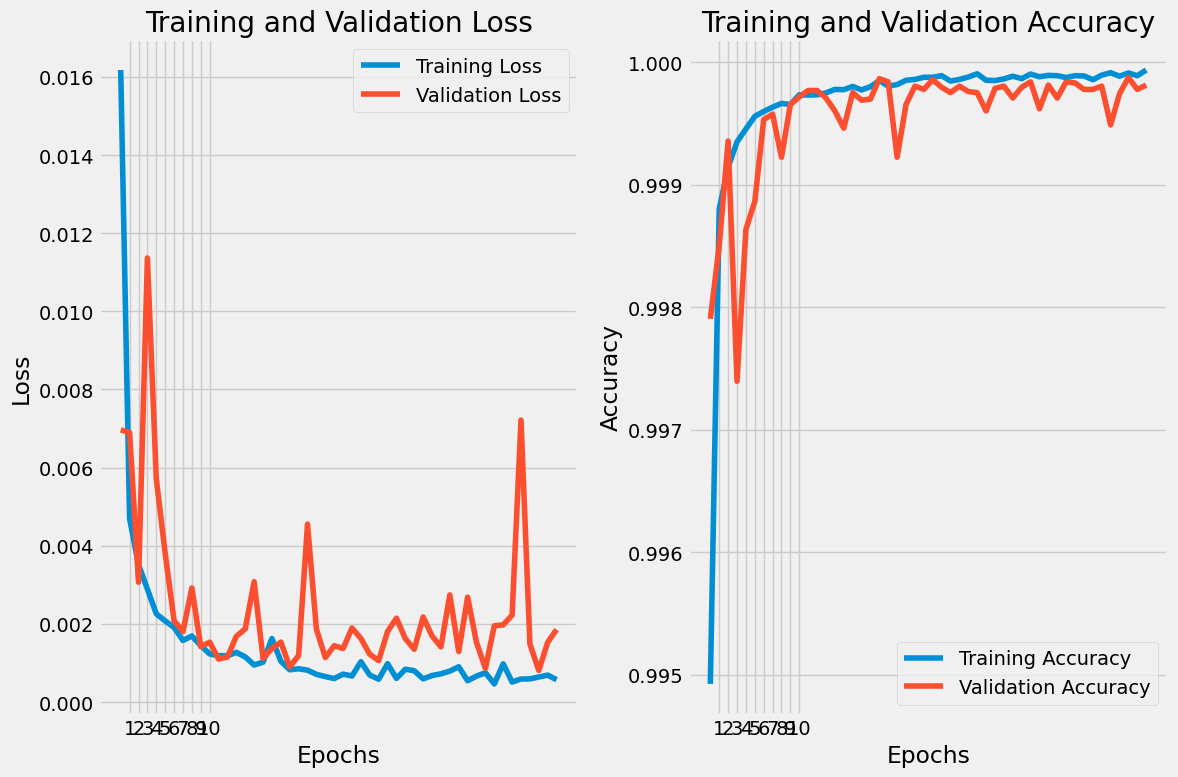

In [23]:
plt.figure(figsize=(12,8))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xticks(range (1 , 11))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xticks(range (1 , 11))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

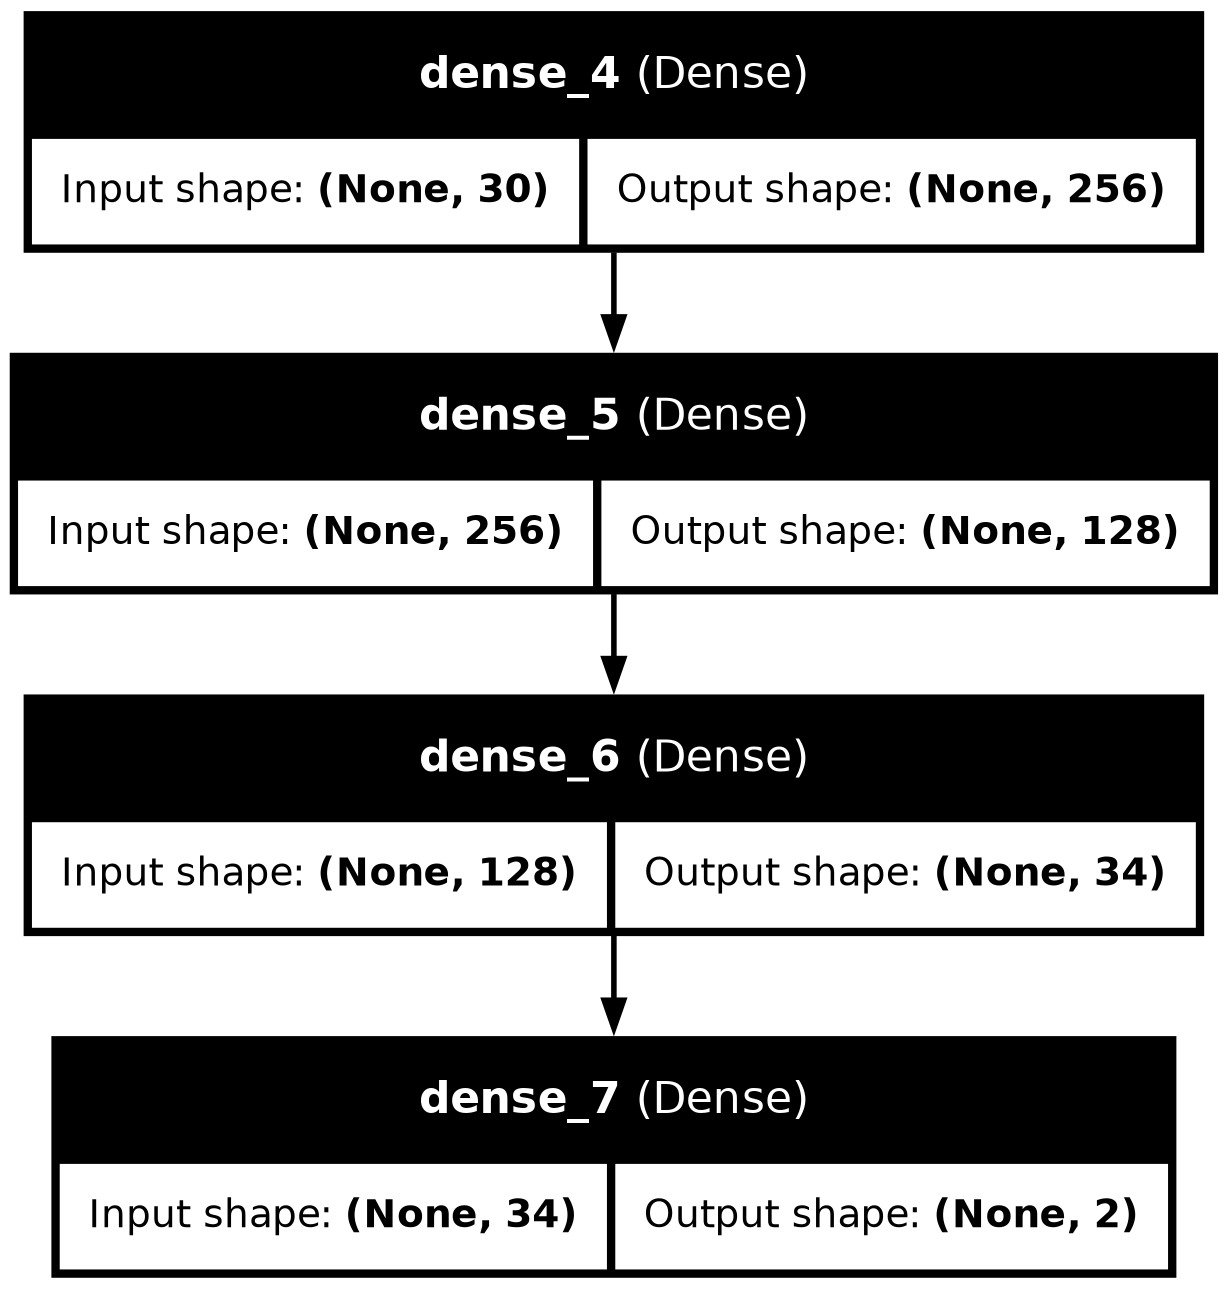

In [27]:
plot_model(modelAdam, to_file='modelAdam.png', show_shapes=True, show_layer_names=True)

In [26]:
y_pred_multiclassAdam = np.argmax(modelAdam.predict(testFile_scaled), axis=1)

dictt = {
    "ID": [i for i in range(len(testFile))],
    "Class": y_pred_multiclassAdam
}
df = pd.DataFrame(dictt)
df.to_csv("Adam_256_128_34 50ep.csv", index=False)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [48]:
!rm -rf /kaggle/working/*

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
